<a href="https://colab.research.google.com/github/Saharsh11/Titanic_ML/blob/master/Titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as mp
import numpy as np
import pandas as pd
import seaborn as sb
%matplotlib inline

titanic = pd.read_csv('titanic.csv')
titanic.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


finding the missing values in the dataset and then filling them.

In [2]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)
titanic[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


doing some categorial plots to understand the survivalrate by combining siblings and parch columns as they combinely go as total family member. Doing this as to understand how having more family members increases of decreases the chances of survival. Here we are using matplotlib to plot figure for each value of family(SibSp and Parch combine) and using seaborn to docategorial plot of survival against combined family to understand the relation.

<Figure size 432x288 with 0 Axes>

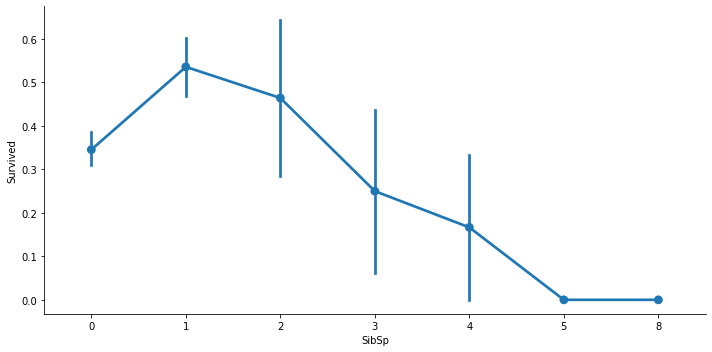

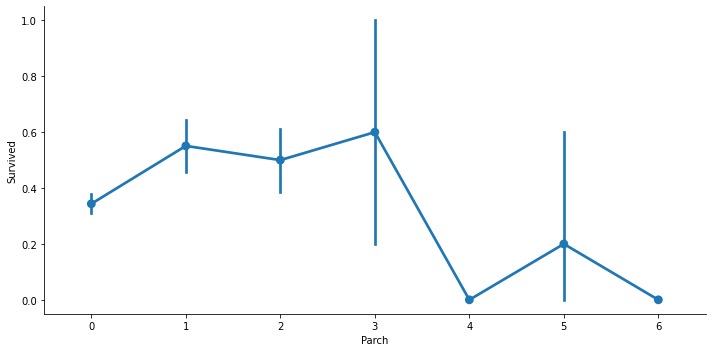

In [ ]:
 for i, col in enumerate(['SibSp','Parch']):
  mp.figure(i)
  sb.catplot(x=col, y='Survived', data = titanic, kind ='point', aspect=2, )

As both SibSp and Parch are showing same trend for survived column we can combine them and can create a common column against that.

In [4]:
titanic['FamilyCnt'] = titanic['SibSp'] + titanic['Parch']

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


Dropping 'SibSp', 'Parch' as there data is used in the familyCnt column and PassengerID and it does not have any significance in predicting the survived peoples

In [6]:
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis =1, inplace = True, )


After cleaning now again seeing if any more empty cells are there and how these can be filled and any more columns that can be dropped

In [7]:
titanic.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin        687
Embarked       2
FamilyCnt      0
dtype: int64

In [14]:
titanic['Cabin_in'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic[0:5]

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilyCnt,Cabin_in
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


In [16]:
titanic['Gender'] = np.where(titanic['Sex'] == 'male', 0, 1)
titanic[0:5]

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilyCnt,Cabin_in,Gender
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0,0


In [20]:
gender = {'male' : 0 , 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender)
titanic[:5]

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilyCnt,Cabin_in,Gender,sex
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0,0,0


In [22]:
titanic.drop(['Ticket', 'Cabin', 'Gender', 'sex', 'Embarked'], axis = 1, inplace = True)
titanic[:5]

,Survived,Pclass,Name,Sex,Age,Fare,FamilyCnt,Cabin_in
0,0,3,"Braund, Mr. Owen Harris",0,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,8.0500,0,0


In [24]:
titanic.to_csv('/Titanic_cleaned.csv', index = False, )

Cleaning of data is done now test and validation is to be done in cleaned data Titanic_cleaned.csv